In [1]:
!pip install dionysus
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dionysus: filename=dionysus-2.0.9-cp310-cp310-linux_x86_64.whl size=343749 sha256=f9dc9e9edfce6d05f70351f044e1ca83fe0fd56687d4e4a491b84127c397d494
  Stored in directory: /root/.cache/pip/wheels/3c/ba/6a/813c63ae0687291480ca1b2d1b68ab4859aac4eafecf3d009d
Successfully built dionysus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 22.9 MB/s eta 0:00:00


In [2]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive',force_remount=True)

import os
os.chdir("/content/drive/My Drive/NASA/Fire Detection")
!ls -ltr

Mounted at /content/drive
total 8
drwx------ 2 root root 4096 Jun  6 00:50 'zzpd fire data'
drwx------ 2 root root 4096 Jun  9 01:01 'zzpd fire data 2'


In [3]:
import numpy as np
import dionysus as d
import matplotlib.pyplot as plt

In [4]:
fname = 'zzpd fire data'
rawFileList = os.listdir(fname)
print (rawFileList)
print (len(rawFileList))

['Tile_1_33_20201032021176.zarr', 'Tile_1_33_20201032116177.zarr', 'Tile_1_33_20201032216177.zarr', 'Tile_1_33_20201031916176.zarr', 'Tile_1_33_20201032126177.zarr', 'Tile_1_33_20201032031176.zarr', 'Tile_1_33_20201031926176.zarr', 'Tile_1_33_20201032041176.zarr', 'Tile_1_33_20201032326177.zarr', 'Tile_1_33_20201032046176.zarr', 'Tile_1_33_20201031821176.zarr', 'Tile_1_33_20201022301177.zarr', 'Tile_1_33_20201022306177.zarr', 'Tile_1_33_20201022241177.zarr', 'Tile_1_33_20201031751176.zarr', 'Tile_1_33_20201031841176.zarr', 'Tile_1_33_20201022246177.zarr', 'Tile_1_33_20201031911176.zarr', 'Tile_1_33_20201030006177.zarr', 'Tile_1_33_20201031846176.zarr', 'Tile_1_33_20201021911176.zarr', 'Tile_1_33_20201021906176.zarr', 'Tile_1_33_20201021916177.zarr', 'Tile_1_33_20201021536176.zarr', 'Tile_1_33_20201021456176.zarr', 'Tile_1_33_20201022056177.zarr', 'Tile_1_33_20201022021177.zarr', 'Tile_1_33_20201022016177.zarr', 'Tile_1_33_20201022226177.zarr', 'Tile_1_33_20201022036177.zarr', 'Tile_1_3

In [5]:
!pip install zarr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 60.6 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=10ba1d11c7632b2c7f546ae6f92dadbf75c9a497a1f02550c0b61f0a1f2197d1
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


In [6]:
import zarr

In [7]:
channel7List = []
channel7Name = []
timeSeriesDict = {}

rawFileList = sorted(rawFileList)

for name in rawFileList:
    channelData = np.array(zarr.open(fname + '//' + name)[:, :, 0]) # select channel 7
    timeSeriesDict[name] = channelData
    channel7List.append(channelData)
    channel7Name.append(name)
    
print (len(channel7List))

37


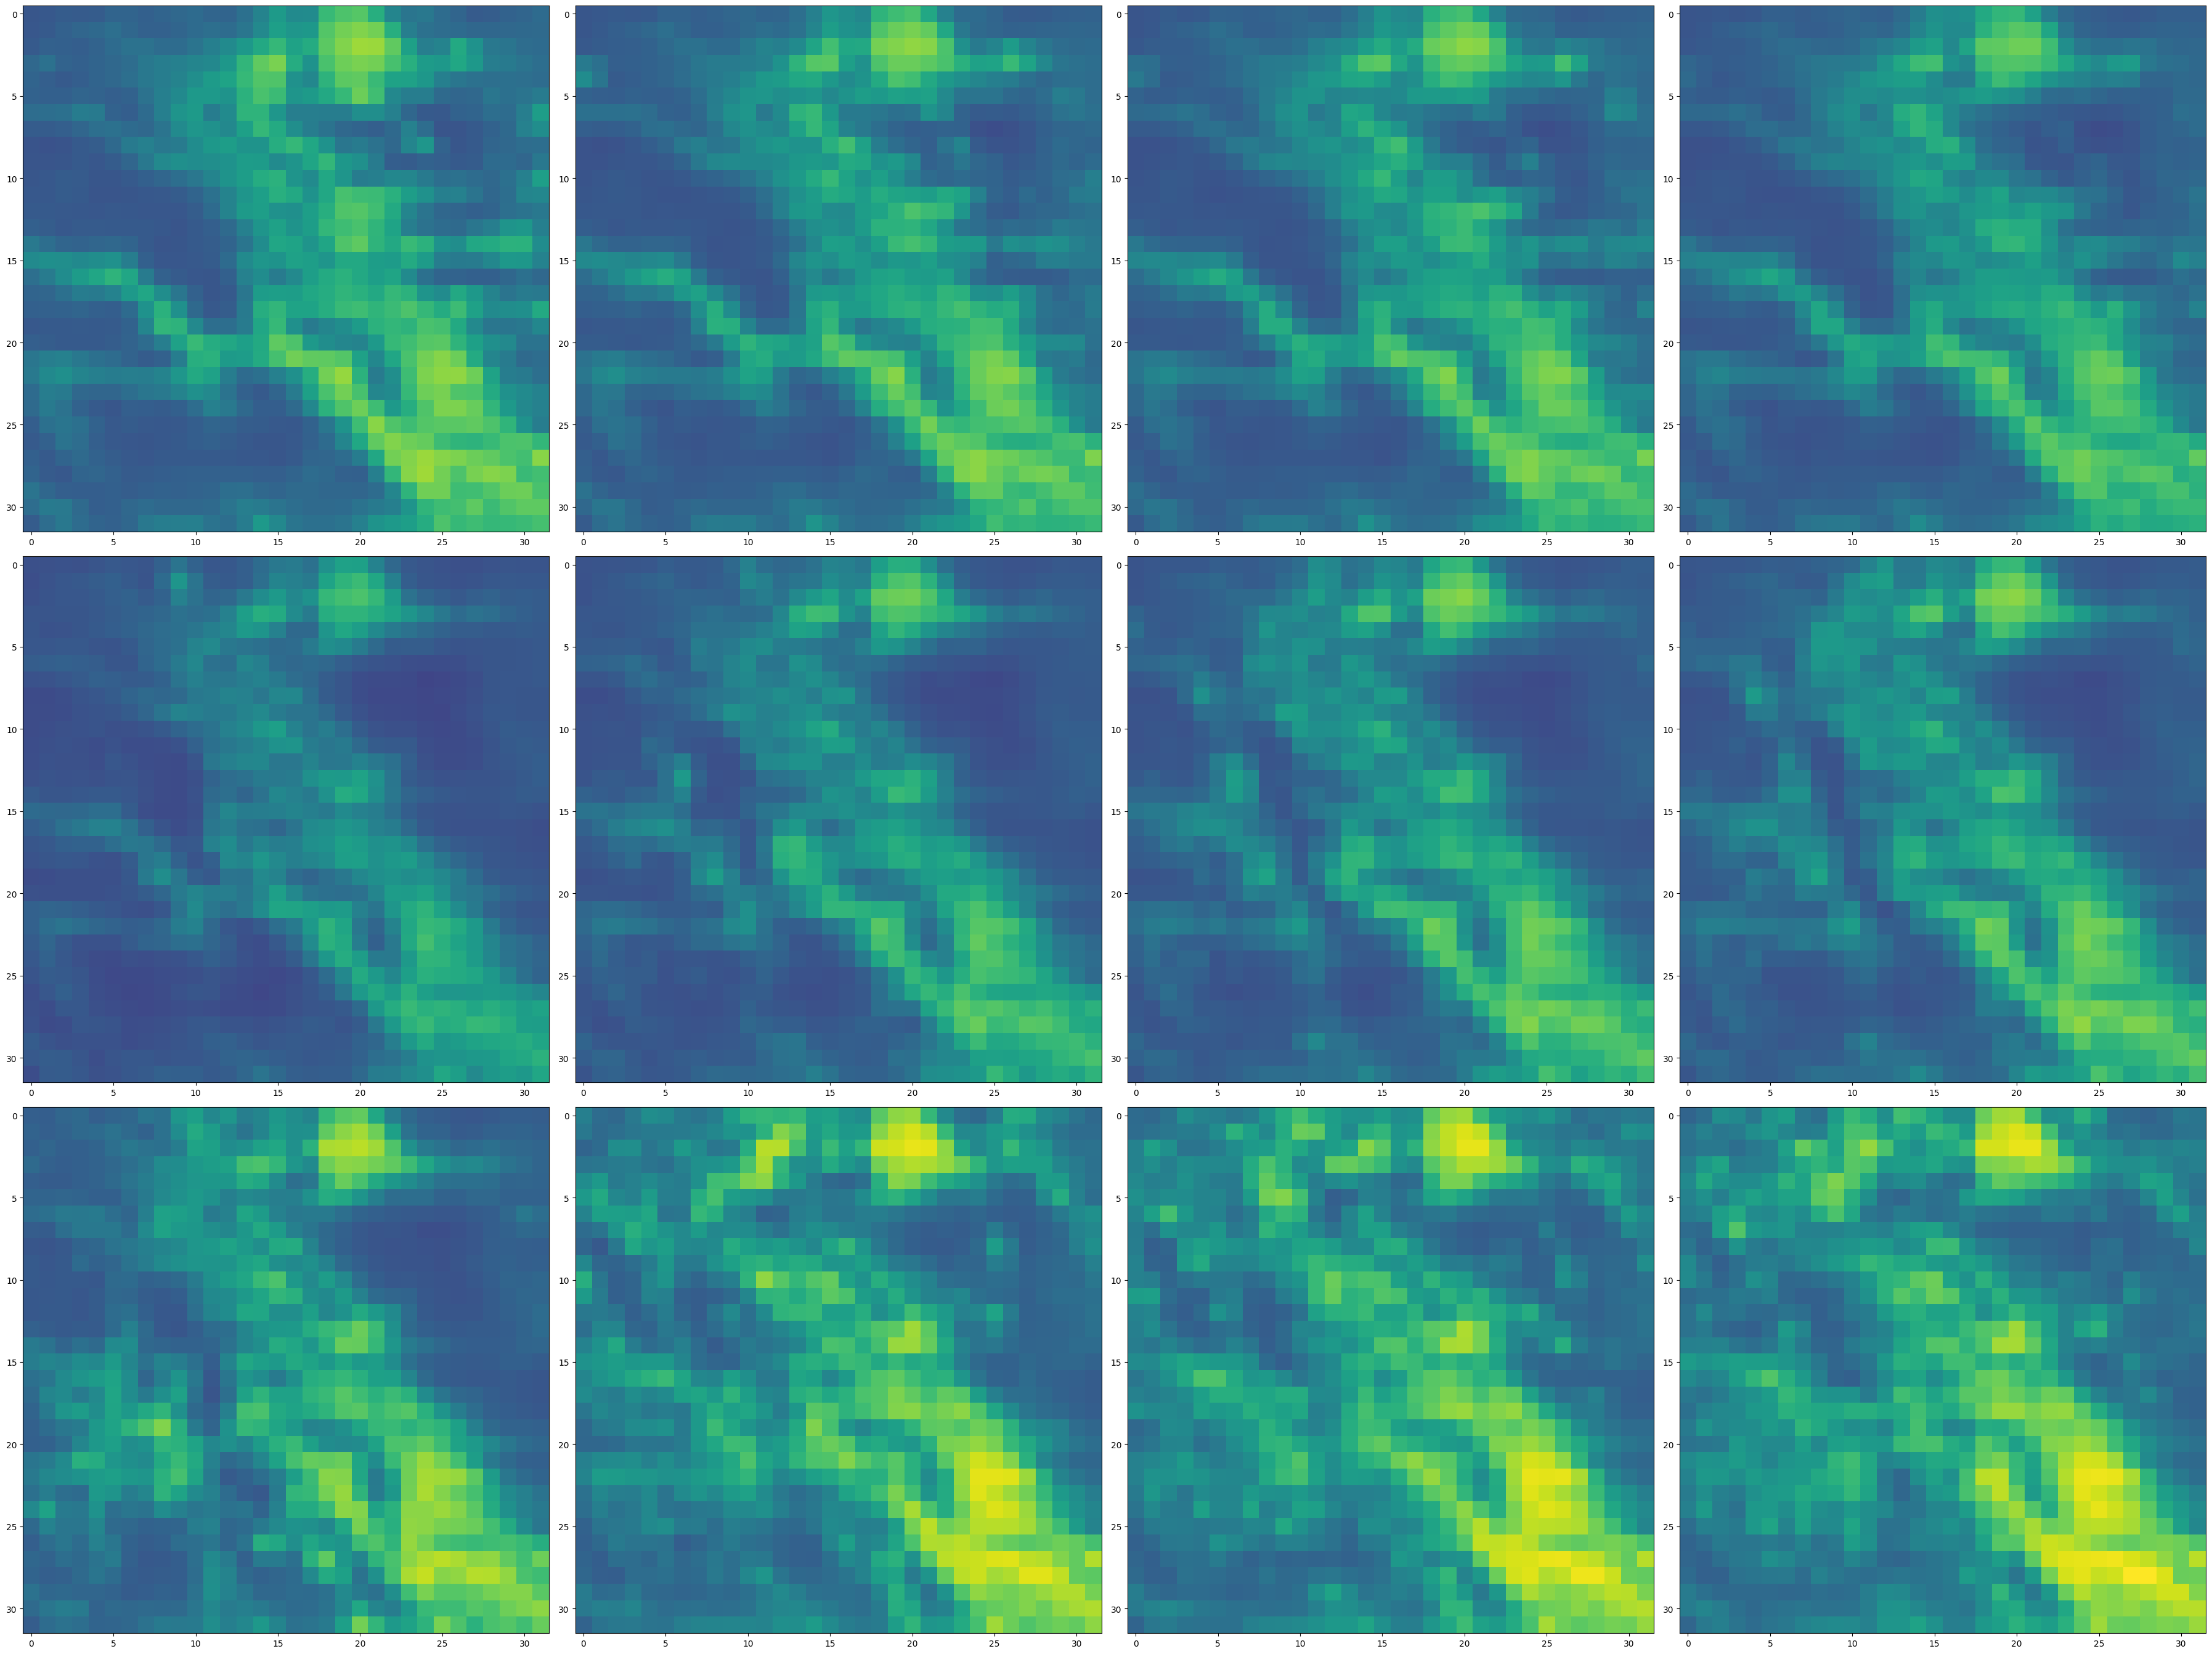

In [ ]:
nrow = 3
ncol = 4
move = 16

fig, axs = plt.subplots(nrow, ncol, figsize=(36, 27))

for i in range(nrow):
    for j in range(ncol):
        axs[i, j].imshow(channel7List[i* ncol + j + move], vmin=0, vmax=1, cmap='viridis') # vmin, vmax may change on different tiles
        #label = dfLabel.loc[dfLabel['fname'] == channel7Name[i* 6 + j], 'fire'].iloc[0]
        #axs[i, j].title.set_text('Label {}'.format(label))

plt.tight_layout()

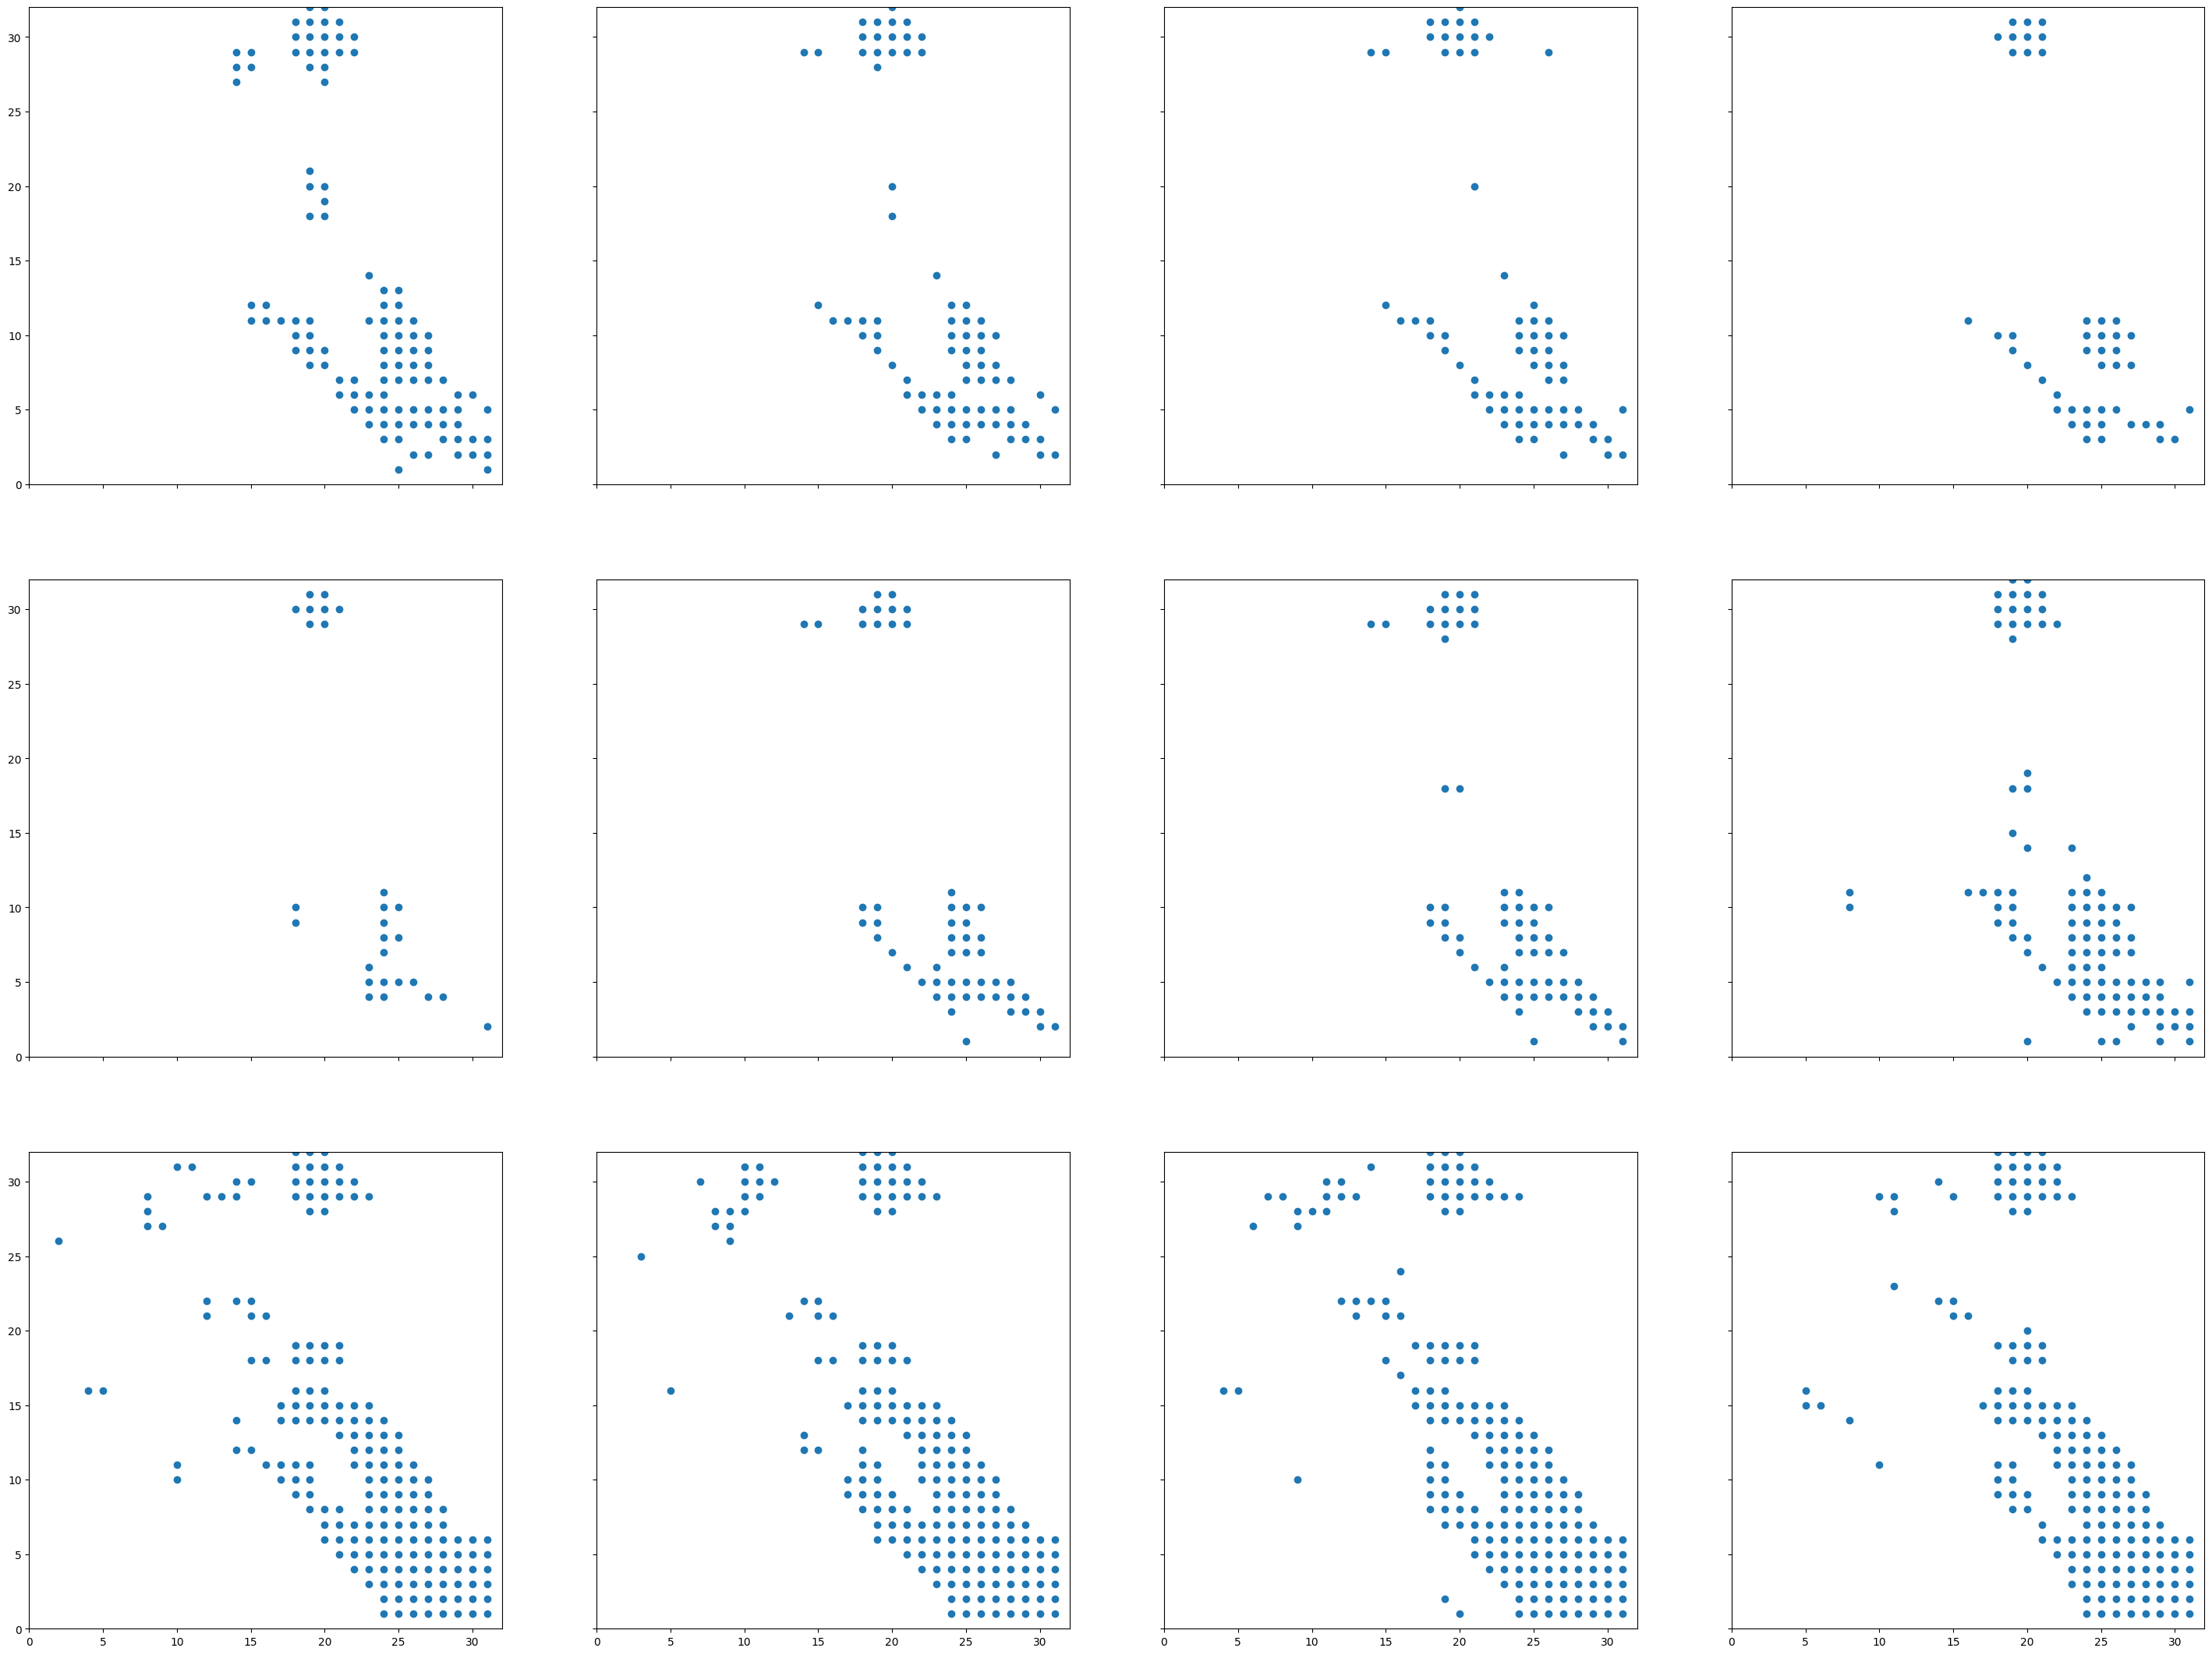

In [ ]:
subLevel = 0.7

fig, ax = plt.subplots(nrow, ncol, sharex='col', sharey='row', figsize=(36, 27))
for i in range(0, nrow):
    for j in range(0, ncol):
        pointcloud = np.argwhere(np.array(channel7List[i*7 + j + move]) > subLevel)
        x = pointcloud[:, 1]
        y = 32 - pointcloud[:, 0]
        ax[i, j].scatter(x, y)
        ax[i, j].set_xlim([0, 32])
        ax[i, j].set_ylim([0, 32])
plt.show()

In [ ]:
def removeInnerPoint(ptCld): # input numpy array
    ptCldList = ptCld.tolist()
    removeList = []
    for pt in ptCldList:
        left = [pt[0], pt[1] - 1]
        right = [pt[0], pt[1] + 1]
        top = [pt[0] - 1, pt[1]]
        bottom = [pt[0] + 1, pt[1]]
        if (left in ptCldList) and (right in ptCldList) and (top in ptCldList) and (bottom in ptCldList):
            removeList.append(pt)
    
    for removePt in removeList:
        ptCldList.remove(removePt)
    return np.array(ptCldList)

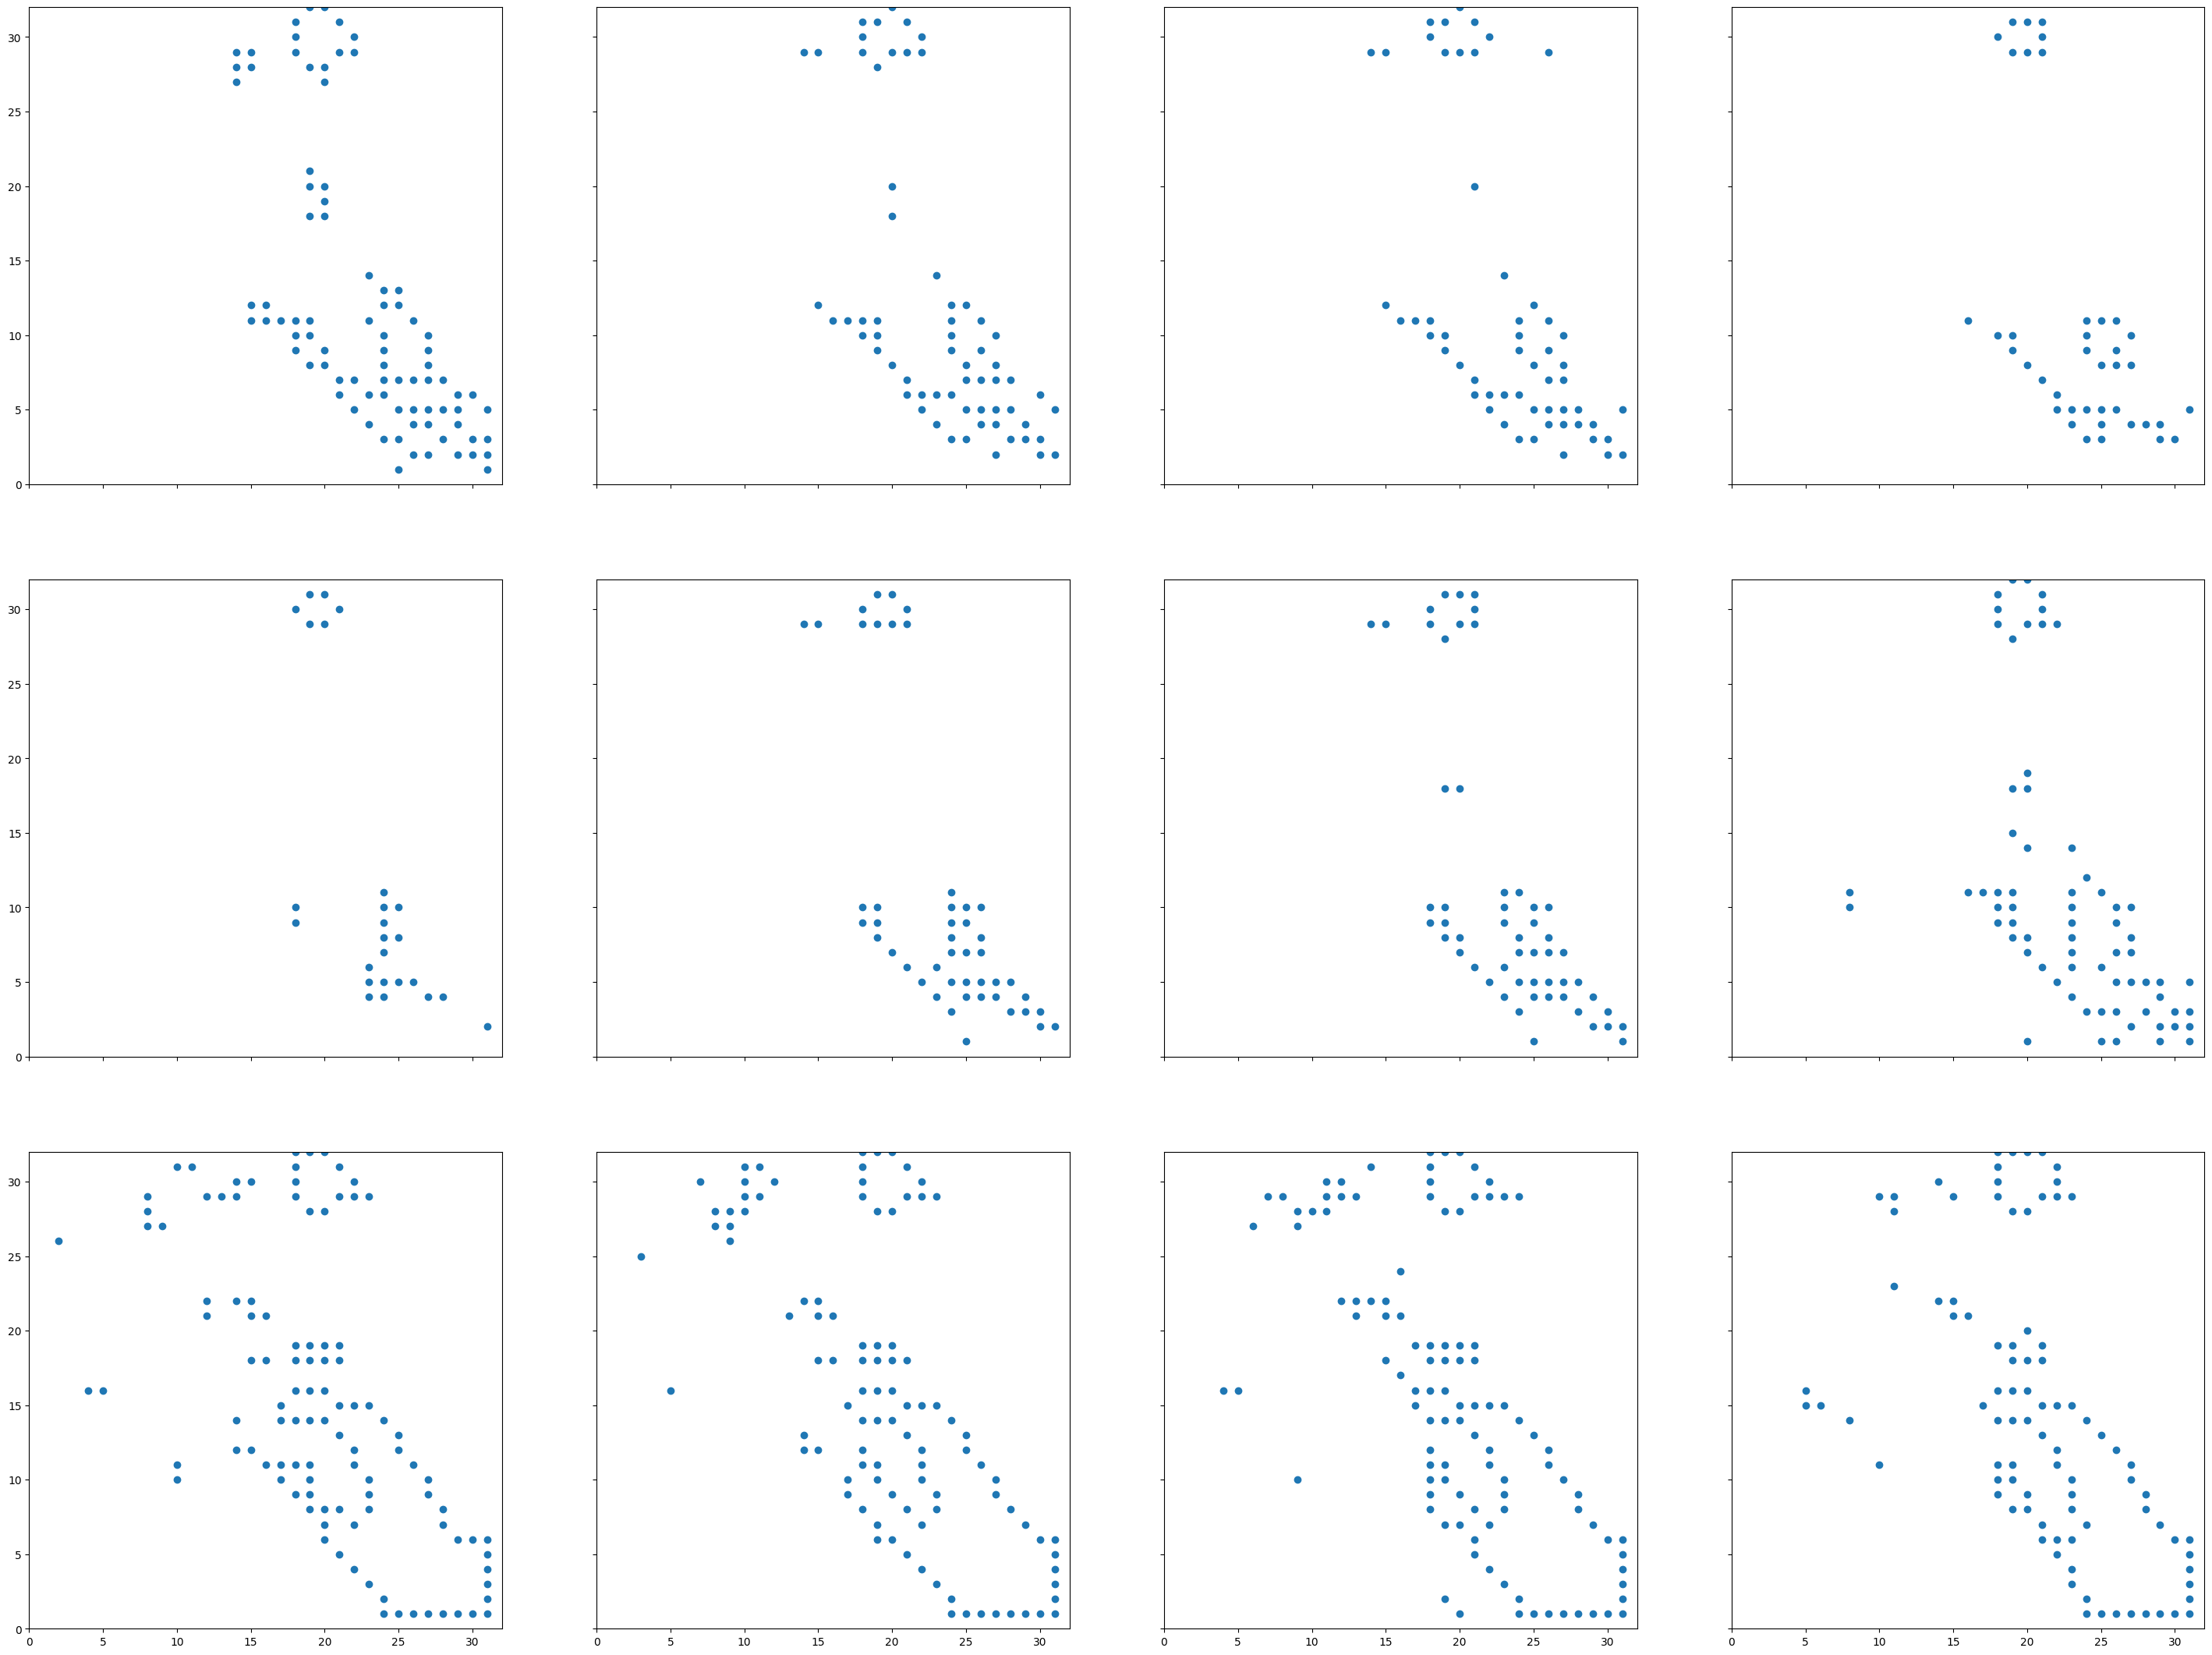

In [ ]:
fig, ax = plt.subplots(nrow, ncol, sharex='col', sharey='row', figsize=(36, 27))

zigzagDataList = []
for i in range(0, nrow):
    for j in range(0, ncol):
        pointcloud = np.argwhere(np.array(channel7List[i*7 + j + move]) > subLevel)
        newPtCld = removeInnerPoint(pointcloud)
        if newPtCld.size == 0:
            x = [0]
            y = [0]
            newPtCld = np.array([[0, 0]])
        else:
            x = newPtCld[:, 1]
            y = 32 - newPtCld[:, 0]
        zigzagDataList.append(newPtCld)
        ax[i, j].scatter(x, y)
        ax[i, j].set_xlim([0, 32])
        ax[i, j].set_ylim([0, 32])

plt.show()

In [ ]:
print (len(zigzagDataList))

12


In [ ]:
def shift_filtration(rips,n):
    "Take a Dionysus filtration and increase the name of all of the vertices by n."
    f = d.Filtration()
    for s in rips:
        dim = s.dimension()
        temp = []
        for i in range(0,dim+1):
            temp.append(s[i]+n)
        f.append(d.Simplex(temp,s.data))
    return f

def get_verts(simp):
    if simp.dimension == 2:
        return [d.Simplex([v], 0) for v in t]
    else:
        return set([s for s in simp.boundary()])

tempPtCldLengthList = []
for i in zigzagDataList:
    tempPtCldLengthList.append(len(i))
ptCldLengthList = np.cumsum(tempPtCldLengthList).tolist()
ptCldLengthList.insert(0, 0)
ptCldLengthList = np.array(ptCldLengthList)

def setup_Zigzag_fixed(lst, r, verbose=False):

    simps_list = []
    times_list = []

    # Initialize A with R(X_0)
    rips = d.fill_rips(lst[0].astype(np.float32), 2, r)
    rips.sort()
    rips_set = set(rips)

    # Initialize A with set of simplices with verts in X_0
    A = rips_set

    # # Add all simps to the list with birth,death=[0,1]
    simps_list = simps_list + [s for s in A]
    times_list = times_list + [[0, 1] for j in range(len(A))]

    for i in range(1, len(lst)):
        print ('Working on number {}'.format(i))
        # Calculate rips of X_{i-1} \cup X_i

        rips = d.fill_rips(np.vstack([lst[i-1], lst[i]]).astype(np.float32), 2, r)
        rips = shift_filtration(rips, ptCldLengthList[i-1])

        # Set of vertices in R(X_i)
        B = d.fill_rips(lst[i].astype(np.float32), 2, r)
        B = shift_filtration(B, ptCldLengthList[i])

        # Set of simplices with verts in X_{i-1} AND X_{i}
        M = set()

        # Loop over vertices in R(X_{i-1} \cup R_i)
        for simp in rips:
            
            # Get list of vertices of simp
            bdy = get_verts(simp)
            #print ('Simplex {} has vertices {}'.format(simp, bdy))
            # If it has no boundary and its in B, its a vertex in B and has been handled
            if not bdy:
                continue

            # If all of its verts are in A, it's been handled in the initialization or the previous iteration
            if bdy.intersection(A) == bdy:
                continue

            # If all of its verts are in B, add it to B
            elif bdy.intersection(B) == bdy:
                #print (simp)
                continue

            # If it has some verts in A and some in B, it only exists in the union
            # Add it to M
            else:
                M.add(simp)
        
        # Add simplices in B with the corresponding birth,death times
        simps_list = simps_list + [s for s in B]
        times_list = times_list + [[i-0.5, i+1] for j in range(len(B))]

        # Add simplicies in M with corresponding birth,death times
        simps_list = simps_list + [s for s in M]
        times_list = times_list + [[i-0.5, i] for j in range(len(M))]

        # Reinitialize for next iteration
        A = B

    filtration = d.Filtration(simps_list)

    #print ('length of time list: {}'.format(len(times_list)))
    #print ('length of simp list: {}'.format(len(simps_list)))
    #print ('length of filtration: {}'.format(len(filtration)))

    return filtration, times_list

In [ ]:
filtration, times_list = setup_Zigzag_fixed(zigzagDataList, 2)
zz, dgms, cells = d.zigzag_homology_persistence(filtration, times_list)

Working on number 1
Working on number 2
Working on number 3
Working on number 4
Working on number 5
Working on number 6
Working on number 7
Working on number 8
Working on number 9
Working on number 10
Working on number 11


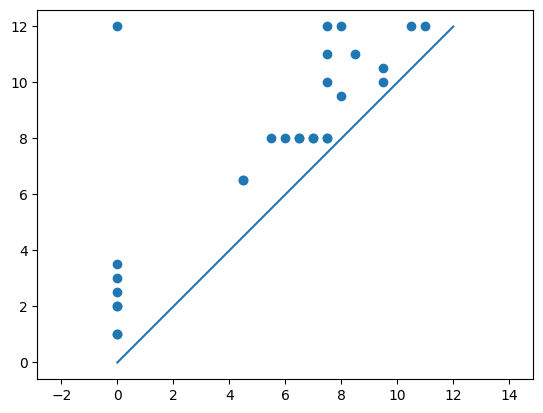

In [ ]:
#d.plot.plot_diagram(dgms[0], show = True)
d.plot.plot_diagram(dgms[1], show = True)